In [1]:
import sys
sys.path.append("c:/users/david/desktop/sandbox")
import pandas as pd
from pyrecs.train import lightfm_wrapper
import numpy as np

%load_ext autoreload
%autoreload 2

C:\Users\David\Desktop\Sandbox\pyrecs\env\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
model_kwargs = {
    'no_components':10,
    'learning_rate':0.05,
    'loss':'warp',
    'random_state':42
}
train_kwargs = {
    'num_epochs':10,
    'num_threads':1,
    'eval_epochs':'all',
    'plot':True
}
lfm = lightfm_wrapper.LightFM(users_col='users', items_col='items', interactions_type='ones',
                              model_kwargs=model_kwargs, train_kwargs=train_kwargs,
                              n_recs=10, tfrs_prediction_batch_size=32)

Training:  90%|█████████████████████████████████████████████████████████████████▋       | 9/10 [00:10<00:00,  1.02it/s]

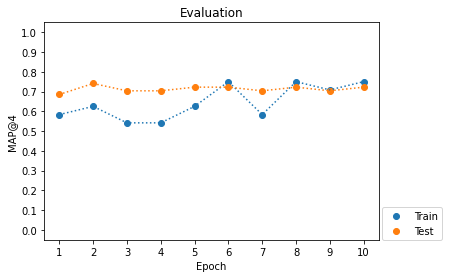

Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.13s/it]


In [3]:
train_df = pd.DataFrame({'users':['user1','user1','user1','user1','user2'], 
                         'items':['item1','item1','item3','item1','item2']})
train_user_features_dict = {
    'user1':{
        'age':21,
        'gender':'f',
        'product_types':['shirt','pants']
    },
    'user2':{
        'age':35,
        'gender':'m',
        'product_types':['shorts']
    }
}
train_item_features_dict = {
    'item1':{
        'color':'blue'
    },
    'item2':{
        'color':'green'
    },
    'item3':{
        'color':'yellow'
    }
}


test_df = pd.DataFrame({'users':['user1','user1','user1','user2', 'user2','user2','user3'],
                        'items':['item1','item2','item3','item1', 'item2','item3','item4']})
test_user_features_dict = {
    'user3':{
        'age':18,
        'gender':'unknown',
        'product_types':['shorts']
    }
}

test_item_features_dict = {
    'item4':{
        'color':'black'
    },
}


lfm.run(train_df=train_df, test_df=test_df, 
        train_user_features_dict=train_user_features_dict, 
        train_item_features_dict=train_item_features_dict,
        test_user_features_dict=test_user_features_dict,
        test_item_features_dict=test_item_features_dict)